In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import matplotlib.pyplot as plt

In [2]:
rawplant = pd.read_csv('../slcapstone/data/plantInfo-raw (1).csv')

In [3]:
rawplant['Name'] = rawplant['Name'].str.split(',', expand = True)[0]
rawplant['Name'] = rawplant['Name'].str.split('-', expand = True)[0]

In [4]:
rawplant = rawplant.drop(columns =['culinaryHints','culinaryPreservation', 'url'])

In [5]:
rawplant['growthType'] = rawplant['sowInstructions'].apply(lambda x: 'Easy to grow' if 'Easy to grow' in x else 'Normal/Hard')

In [6]:
import re


def extract_format(text):
    match = re.search(r'(\d+\s*(?:-\s*\d+)?\s*(weeks|months|years)?)', text)
    if match:
        return match.group(0)
    else:
        return None


rawplant['harvestInstructions'] = rawplant['harvestInstructions'].apply(extract_format)

In [7]:
compatible_plants_split = rawplant['compatiblePlants'].str.split(': ', expand=True)
num_cols = len(compatible_plants_split.columns)


compatible_plants_split.columns = [f'compatiblePlant_{i}' for i in range(num_cols)]
rawplant = rawplant.drop(columns=['compatiblePlants'])

rawplant = pd.concat([rawplant, compatible_plants_split], axis=1)
rawplant

,Name,sowInstructions,spaceInstructions,harvestInstructions,avoidInstructions,image,growthType,compatiblePlant_0,compatiblePlant_1
0,Amaranth,Sow in garden. Sow seed at a depth approximate...,Space plants: 20 inches apart,7-8 weeks,NaN,http://gardenate.com/image/1/thumb/150/150,Normal/Hard,Compatible with (can grow beside),"Onions, corn, peppers, egg plant, tomatoes"
1,Beans,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 - 6 inches apart,7-10 weeks,"Avoid growing close to: Alliums (Chives, leek,...",http://gardenate.com/image/43/thumb/150/150; h...,Easy to grow,Compatible with (can grow beside),"Sweetcorn, spinach, lettuce, summer savory, di..."
2,Sweet corn,Sow in garden. Sow seed at a depth approximate...,Space plants: 8 - 12 inches apart,11-14 weeks,Avoid growing close to: Celery.,http://gardenate.com/image/40/thumb/150/150; h...,Normal/Hard,Compatible with (can grow beside),"All beans, cucumber, melons, peas, pumpkin, sq..."
3,Cowpeas,Easy to grow. When soil begins to warm up. Aft...,Space plants: Rows 1 Metre apart,11-14 weeks,NaN,NaN,Easy to grow,NaN,NaN
4,Corn Salad,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 6 inches apart,5-8 weeks,NaN,http://gardenate.com/image/130/thumb/150/150,Easy to grow,Compatible with (can grow beside),Onions
...,...,...,...,...,...,...,...,...,...
89,Rosella,"Sow in garden, or start in seed trays. Sow see...",Space plants: 140 cm apart,21-25 weeks,NaN,http://gardenate.com/image/108/thumb/150/150,Normal/Hard,Compatible with (can grow beside),"Feverfew, Coriander, Nasturtium and Hyssop"
90,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,1 years,Avoid growing close to: Potatoes,http://gardenate.com/image/44/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Beans, Carrots, Cabbages, Sage"
91,Rutabaga,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 8 inches apart,10-14 weeks,Avoid growing close to: Potatoes,NaN,Easy to grow,Compatible with (can grow beside),"Peas, Beans, Chives"
92,Salsify,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 6 - 8 inches apart,14-21 weeks,NaN,http://gardenate.com/image/142/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Beans, Brassicas, Carrots, Celeriac, Endive, K..."


In [8]:
rawplant.columns

Index(['Name', 'sowInstructions', 'spaceInstructions', 'harvestInstructions',
       'avoidInstructions', 'image', 'growthType', 'compatiblePlant_0',
       'compatiblePlant_1'],
      dtype='object')

In [9]:
rawplant.drop(columns = ['compatiblePlant_0'])

,Name,sowInstructions,spaceInstructions,harvestInstructions,avoidInstructions,image,growthType,compatiblePlant_1
0,Amaranth,Sow in garden. Sow seed at a depth approximate...,Space plants: 20 inches apart,7-8 weeks,NaN,http://gardenate.com/image/1/thumb/150/150,Normal/Hard,"Onions, corn, peppers, egg plant, tomatoes"
1,Beans,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 - 6 inches apart,7-10 weeks,"Avoid growing close to: Alliums (Chives, leek,...",http://gardenate.com/image/43/thumb/150/150; h...,Easy to grow,"Sweetcorn, spinach, lettuce, summer savory, di..."
2,Sweet corn,Sow in garden. Sow seed at a depth approximate...,Space plants: 8 - 12 inches apart,11-14 weeks,Avoid growing close to: Celery.,http://gardenate.com/image/40/thumb/150/150; h...,Normal/Hard,"All beans, cucumber, melons, peas, pumpkin, sq..."
3,Cowpeas,Easy to grow. When soil begins to warm up. Aft...,Space plants: Rows 1 Metre apart,11-14 weeks,NaN,NaN,Easy to grow,NaN
4,Corn Salad,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 6 inches apart,5-8 weeks,NaN,http://gardenate.com/image/130/thumb/150/150,Easy to grow,Onions
...,...,...,...,...,...,...,...,...
89,Rosella,"Sow in garden, or start in seed trays. Sow see...",Space plants: 140 cm apart,21-25 weeks,NaN,http://gardenate.com/image/108/thumb/150/150,Normal/Hard,"Feverfew, Coriander, Nasturtium and Hyssop"
90,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,1 years,Avoid growing close to: Potatoes,http://gardenate.com/image/44/thumb/150/150,Easy to grow,"Beans, Carrots, Cabbages, Sage"
91,Rutabaga,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 8 inches apart,10-14 weeks,Avoid growing close to: Potatoes,NaN,Easy to grow,"Peas, Beans, Chives"
92,Salsify,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 6 - 8 inches apart,14-21 weeks,NaN,http://gardenate.com/image/142/thumb/150/150,Easy to grow,"Beans, Brassicas, Carrots, Celeriac, Endive, K..."


In [10]:
rawplant = rawplant.rename(columns = {'Name':'plants'})
rawplant

,plants,sowInstructions,spaceInstructions,harvestInstructions,avoidInstructions,image,growthType,compatiblePlant_0,compatiblePlant_1
0,Amaranth,Sow in garden. Sow seed at a depth approximate...,Space plants: 20 inches apart,7-8 weeks,NaN,http://gardenate.com/image/1/thumb/150/150,Normal/Hard,Compatible with (can grow beside),"Onions, corn, peppers, egg plant, tomatoes"
1,Beans,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 - 6 inches apart,7-10 weeks,"Avoid growing close to: Alliums (Chives, leek,...",http://gardenate.com/image/43/thumb/150/150; h...,Easy to grow,Compatible with (can grow beside),"Sweetcorn, spinach, lettuce, summer savory, di..."
2,Sweet corn,Sow in garden. Sow seed at a depth approximate...,Space plants: 8 - 12 inches apart,11-14 weeks,Avoid growing close to: Celery.,http://gardenate.com/image/40/thumb/150/150; h...,Normal/Hard,Compatible with (can grow beside),"All beans, cucumber, melons, peas, pumpkin, sq..."
3,Cowpeas,Easy to grow. When soil begins to warm up. Aft...,Space plants: Rows 1 Metre apart,11-14 weeks,NaN,NaN,Easy to grow,NaN,NaN
4,Corn Salad,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 6 inches apart,5-8 weeks,NaN,http://gardenate.com/image/130/thumb/150/150,Easy to grow,Compatible with (can grow beside),Onions
...,...,...,...,...,...,...,...,...,...
89,Rosella,"Sow in garden, or start in seed trays. Sow see...",Space plants: 140 cm apart,21-25 weeks,NaN,http://gardenate.com/image/108/thumb/150/150,Normal/Hard,Compatible with (can grow beside),"Feverfew, Coriander, Nasturtium and Hyssop"
90,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,1 years,Avoid growing close to: Potatoes,http://gardenate.com/image/44/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Beans, Carrots, Cabbages, Sage"
91,Rutabaga,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 4 - 8 inches apart,10-14 weeks,Avoid growing close to: Potatoes,NaN,Easy to grow,Compatible with (can grow beside),"Peas, Beans, Chives"
92,Salsify,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 6 - 8 inches apart,14-21 weeks,NaN,http://gardenate.com/image/142/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Beans, Brassicas, Carrots, Celeriac, Endive, K..."


In [45]:
rawplant['spaceInstructions'] = rawplant['spaceInstructions'].str.split(':').str[-1].str.strip()
rawplant

,plants,sowInstructions,spaceInstructions,harvestInstructions,avoidInstructions,image,growthType,compatiblePlant_0,compatiblePlant_1,harvest_time
0,Amaranth,Sow in garden. Sow seed at a depth approximate...,20 inches apart,7-8 weeks,NaN,http://gardenate.com/image/1/thumb/150/150,Normal/Hard,Compatible with (can grow beside),"Onions, corn, peppers, egg plant, tomatoes",7.0
1,Beans,Easy to grow. Sow in garden. Sow seed at a dep...,2 - 6 inches apart,7-10 weeks,"Avoid growing close to: Alliums (Chives, leek,...",http://gardenate.com/image/43/thumb/150/150; h...,Easy to grow,Compatible with (can grow beside),"Sweetcorn, spinach, lettuce, summer savory, di...",7.0
2,Sweet corn,Sow in garden. Sow seed at a depth approximate...,8 - 12 inches apart,11-14 weeks,Avoid growing close to: Celery.,http://gardenate.com/image/40/thumb/150/150; h...,Normal/Hard,Compatible with (can grow beside),"All beans, cucumber, melons, peas, pumpkin, sq...",11.0
3,Cowpeas,Easy to grow. When soil begins to warm up. Aft...,Rows 1 Metre apart,11-14 weeks,NaN,NaN,Easy to grow,NaN,NaN,11.0
4,Corn Salad,Easy to grow. Sow in garden. Sow seed at a dep...,4 - 6 inches apart,5-8 weeks,NaN,http://gardenate.com/image/130/thumb/150/150,Easy to grow,Compatible with (can grow beside),Onions,5.0
...,...,...,...,...,...,...,...,...,...,...
89,Rosella,"Sow in garden, or start in seed trays. Sow see...",140 cm apart,21-25 weeks,NaN,http://gardenate.com/image/108/thumb/150/150,Normal/Hard,Compatible with (can grow beside),"Feverfew, Coriander, Nasturtium and Hyssop",21.0
90,Rosemary,Easy to grow. Plant cuttings . Best planted at...,39 - 59 inches apart,1 years,Avoid growing close to: Potatoes,http://gardenate.com/image/44/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Beans, Carrots, Cabbages, Sage",1.0
91,Rutabaga,Easy to grow. Sow in garden. Sow seed at a dep...,4 - 8 inches apart,10-14 weeks,Avoid growing close to: Potatoes,NaN,Easy to grow,Compatible with (can grow beside),"Peas, Beans, Chives",10.0
92,Salsify,Easy to grow. Sow in garden. Sow seed at a dep...,6 - 8 inches apart,14-21 weeks,NaN,http://gardenate.com/image/142/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Beans, Brassicas, Carrots, Celeriac, Endive, K...",14.0


In [48]:
def convert_to_square_feet(space_instructions):
    if 'inches' in space_instructions:
        # Extract the range of inches
        inches_range = space_instructions.split(' ')[0]
        # Check if the range contains numeric values
        if '-' in inches_range:
            inches = [int(num) for num in inches_range.split('-')]
            feet = sum(inches) / 12  # 12 inches in a foot
            return feet ** 2  # Area in square feet
        else:
            return None
    elif 'cm' in space_instructions:
        # Extract the value in centimeters
        cm_value = int(space_instructions.split(' ')[0])
        # Convert to feet
        feet = cm_value / 30.48  # 1 cm = 0.0328084 feet
        return feet ** 2  # Area in square feet
    elif 'Metre' in space_instructions:
        # Extract the value in meters
        meter_value = int(space_instructions.split(' ')[1])
        # Convert to feet
        feet = meter_value * 3.28084  # 1 meter = 3.28084 feet
        return feet ** 2  # Area in square feet
    else:
        return None  # Return None for other cases

# Apply the function to convert space instructions to square feet
rawplant['space_sqft'] = rawplant['spaceInstructions'].apply(convert_to_square_feet)

# Calculate the number of different types of plants that can fit in 1 acre (43,560 square feet)
plants_in_1_acre = rawplant[rawplant['space_sqft'].notna()]['space_sqft'].count()

print("Number of different types of plants that can fit in 1 acre:", plants_in_1_acre)
  

Number of different types of plants that can fit in 1 acre: 6


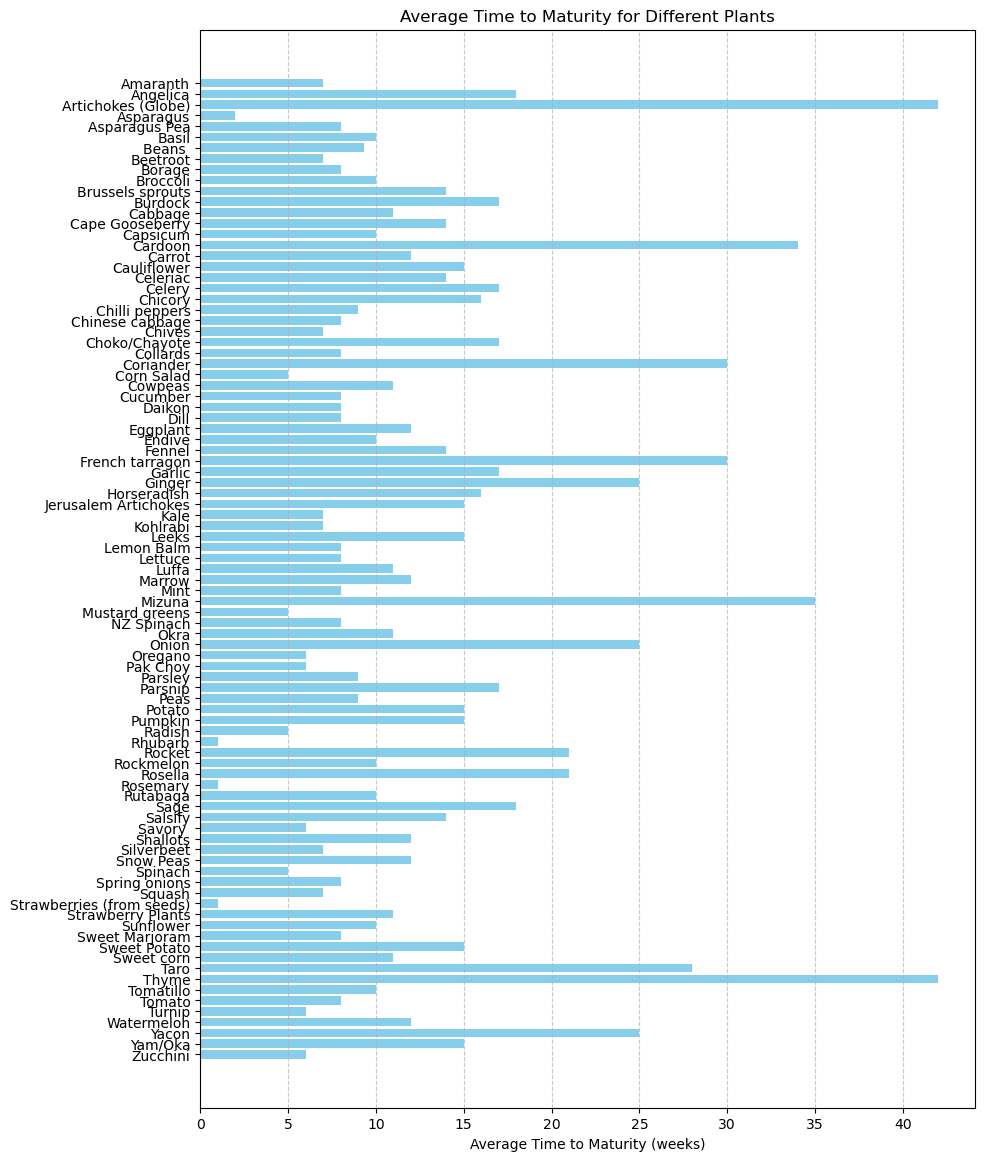

In [38]:
rawplant['harvest_time'] = rawplant['harvestInstructions'].str.extract(r'(\d+)').astype(float)

# Calculate average time taken for each plant to reach maturity
average_time = rawplant.groupby('plants')['harvest_time'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 14))
plt.barh(average_time['plants'], average_time['harvest_time'], color='skyblue')
plt.xlabel('Average Time to Maturity (weeks)')
plt.title('Average Time to Maturity for Different Plants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

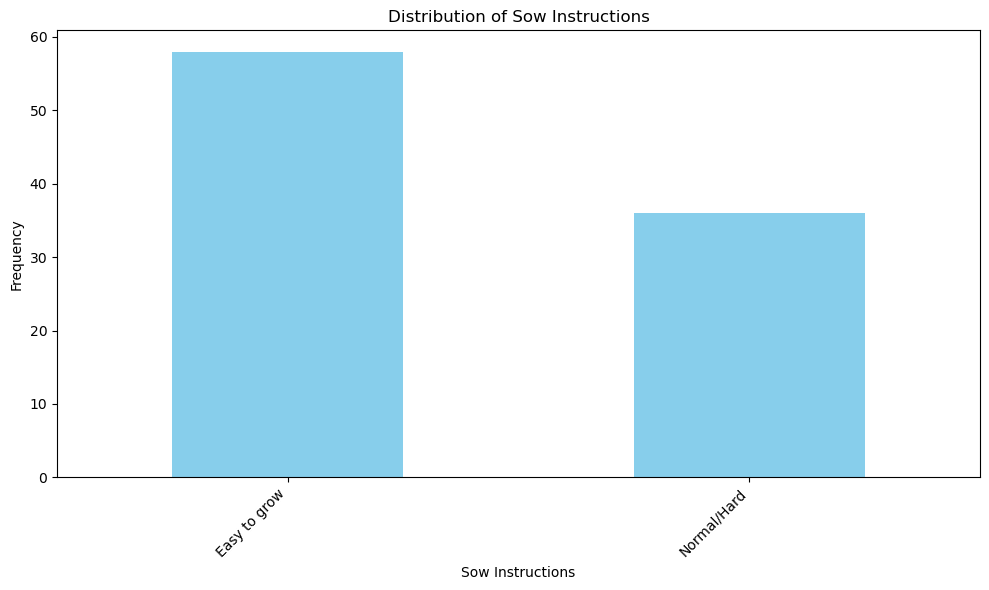

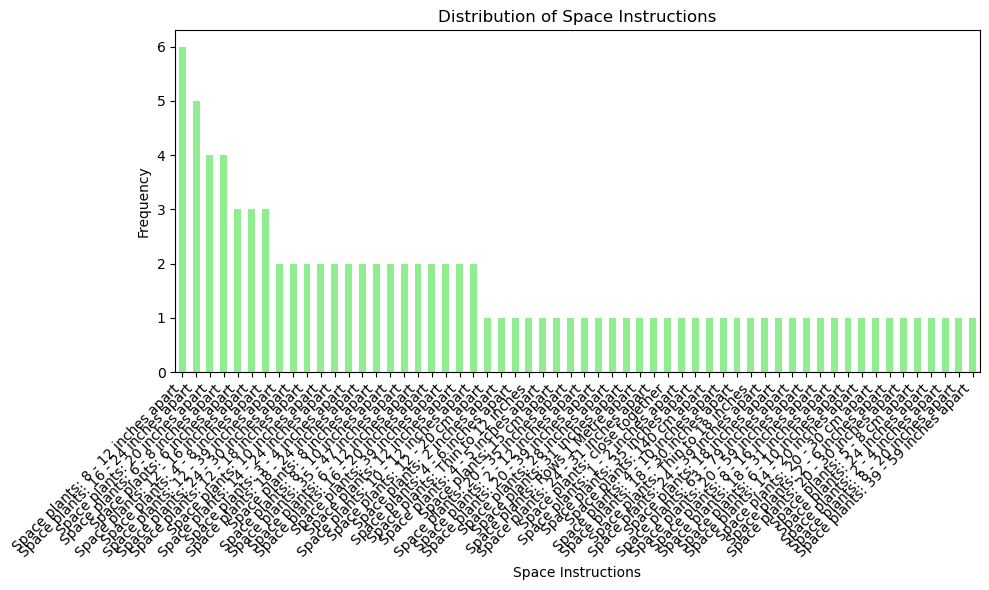

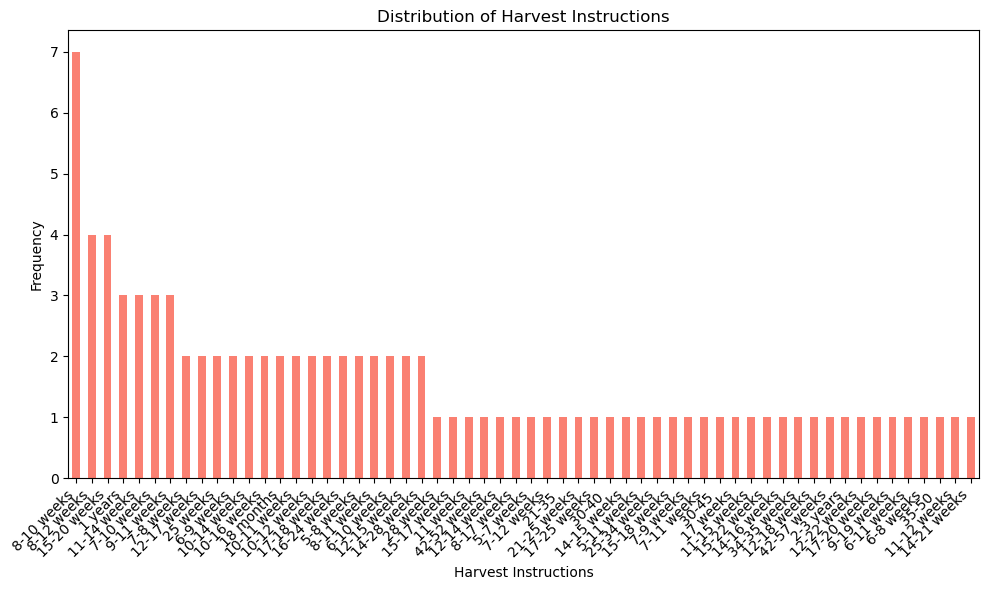

In [40]:
sow_counts = rawplant['growthType'].value_counts()
space_counts = rawplant['spaceInstructions'].value_counts()
harvest_counts = rawplant['harvestInstructions'].value_counts()

# Plot sow instructions
plt.figure(figsize=(10, 6))
sow_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sow Instructions')
plt.xlabel('Sow Instructions')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot space instructions
plt.figure(figsize=(10, 6))
space_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Space Instructions')
plt.xlabel('Space Instructions')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot harvest instructions
plt.figure(figsize=(10, 6))
harvest_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Harvest Instructions')
plt.xlabel('Harvest Instructions')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
compatible_vegetables = {}

for index, row in rawplant.iterrows():
    compatible_plants = row['compatiblePlant_1']
    if pd.notnull(compatible_plants):
        compatible_plants = [plant.strip() for plant in compatible_plants.split(',')]
        compatible_vegetables[row['plants']] = compatible_plants
compatible_pairs = {}
for vegetable, compatible_plants in compatible_vegetables.items():
    for plant in compatible_plants:
        if plant in compatible_vegetables.keys():
            if vegetable not in compatible_pairs:
                compatible_pairs[vegetable] = [plant]
            else:
                compatible_pairs[vegetable].append(plant)
for vegetable, compatible_plants in compatible_pairs.items():
    print(f"{vegetable} can be planted with: {', '.join(compatible_plants)}")

Chives can be planted with: Parsley
Coriander can be planted with: Dill
Carrot can be planted with: Leeks, Lettuce, Sage, Peas, Celery, Rosemary
Capsicum can be planted with: Basil, Parsley, Amaranth
Cucumber can be planted with: Celery, Lettuce, Coriander, Fennel, Dill
Asparagus can be planted with: Parsley, Basil, Lettuce
Basil can be planted with: Tomato
Beetroot can be planted with: Lettuce, Cabbage, Dill
Potato can be planted with: Peas
Parsnip can be planted with: Capsicum, Peas, Garlic
Parsley can be planted with: Chives, Asparagus
Oregano can be planted with: Broccoli
Onion can be planted with: Lemon Balm, Borage, Silverbeet, Lettuce, Amaranth
Mizuna can be planted with: Radish
Marrow can be planted with: Peas
Luffa can be planted with: Peas
Lettuce can be planted with: Radish, Borage
Dill can be planted with: Cabbage, Coriander, Fennel
Garlic can be planted with: Dill
Zucchini can be planted with: Silverbeet
Turnip can be planted with: Peas, Chives, Spinach, Chicory
Tomato can

In [12]:
pests = pd.read_csv('../slcapstone/data/pests.csv')

In [13]:
rawpest = pd.merge(rawplant, pests, on='plants')
rawpest

,plants,sowInstructions,spaceInstructions,harvestInstructions,avoidInstructions,image,growthType,compatiblePlant_0,compatiblePlant_1,Repels
0,Basil,"Grow in seed trays, and plant out in 4-6 weeks...",Space plants: 8 - 10 inches apart,10-12 weeks,NaN,http://gardenate.com/image/22/thumb/150/150; h...,Normal/Hard,Compatible with (can grow beside),Tomato,mosquitos
1,Basil,"Grow in seed trays, and plant out in 4-6 weeks...",Space plants: 8 - 10 inches apart,10-12 weeks,NaN,http://gardenate.com/image/22/thumb/150/150; h...,Normal/Hard,Compatible with (can grow beside),Tomato,house flies
2,Oregano,"Sow in garden, or start in seed trays. Sow see...",Space plants: 6 inches apart,6-8 weeks,NaN,http://gardenate.com/image/57/thumb/150/150; h...,Normal/Hard,Compatible with (can grow beside),Broccoli,deer
3,Mint,Easy to grow. Grow in trays and plant out or s...,Space plants: 12 inches apart,8-12 weeks,NaN,http://gardenate.com/image/135/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Cabbages, Tomatoes",mosquitos
4,Mint,Easy to grow. Grow in trays and plant out or s...,Space plants: 12 inches apart,8-12 weeks,NaN,http://gardenate.com/image/135/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Cabbages, Tomatoes",snails
5,Mint,Easy to grow. Grow in trays and plant out or s...,Space plants: 12 inches apart,8-12 weeks,NaN,http://gardenate.com/image/135/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Cabbages, Tomatoes",ants
6,Dill,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 6 inches apart,8-12 weeks,NaN,http://gardenate.com/image/131/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Cabbage, Coriander, Fennel, tomatoes, broccoli",bugs
7,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,1 years,Avoid growing close to: Potatoes,http://gardenate.com/image/44/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Beans, Carrots, Cabbages, Sage",snails
8,Rosemary,Easy to grow. Plant cuttings . Best planted at...,Space plants: 39 - 59 inches apart,1 years,Avoid growing close to: Potatoes,http://gardenate.com/image/44/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Beans, Carrots, Cabbages, Sage",mosquitos


In [14]:
URL = 'https://www.fda.gov/food/food-labeling-nutrition/raw-fruits-poster-text-version-accessible-version'
response = requests.get(URL)

In [15]:
soup = BS(response.text)

In [16]:
table_html = str(soup.find('table'))

from IPython.core.display import HTML

HTML(table_html)

Fruits Serving Size (gram weight/ ounce weight),Calories,Calories from Fat,Total Fat (g),Total Fat (%DV),Sodium (mg),Sodium (%DV),Potassium (mg),Potassium (%DV),Total Carb. (g),Total Carb. (%DV),Dietary Fiber (g),Dietary Fiber (%DV),Sugars (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
Apple 1 large (242 g/ 8 oz),130,0,0,0,0,0,260,7,34,11,5,20,25,1,2,8,2,2
"Avocado California, 1/5 medium (30 g/ 1.1 oz)",50,35,4.5,7,0,0,140,4,3,1,1,4,0,1,0,4,0,2
Banana 1 medium (126 g/ 4.5 oz),110,0,0,0,0,0,450,13,30,10,3,12,19,1,2,15,0,2
Cantaloupe 1/4 medium (134 g/ 4.8 oz),50,0,0,0,20,1,240,7,12,4,1,4,11,1,120,80,2,2
Grapefruit 1/2 medium (154 g/ 5.5 oz),60,0,0,0,0,0,160,5,15,5,2,8,11,1,35,100,4,0
Grapes 3/4 cup (126 g/ 4.5 oz),90,0,0,0,15,1,240,7,23,8,1,4,20,0,0,2,2,0
Honeydew Melon 1/10 medium melon (134 g/ 4.8 oz),50,0,0,0,30,1,210,6,12,4,1,4,11,1,2,45,2,2
Kiwifruit 2 medium (148 g/ 5.3 oz),90,10,1,2,0,0,450,13,20,7,4,16,13,1,2,240,4,2
Lemon 1 medium (58 g/ 2.1 oz),15,0,0,0,0,0,75,2,5,2,2,8,2,0,0,40,2,0
Lime 1 medium (67 g/ 2.4 oz),20,0,0,0,0,0,75,2,7,2,2,8,0,0,0,35,0,0


In [17]:
fruit = pd.read_html(str(soup.find('table')))[0]

In [18]:
fruit = fruit.rename(columns={'Fruits  Serving  Size  (gram  weight/  ounce  weight)':'fruit name'})

In [19]:
fruit['plants'] = fruit['fruit name'].str.split().str[0]
fruit

,fruit name,Calories,Calories from Fat,Total Fat (g),Total Fat (%DV),Sodium (mg),Sodium (%DV),Potassium (mg),Potassium (%DV),Total Carb. (g),Total Carb. (%DV),Dietary Fiber (g),Dietary Fiber (%DV),Sugars (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV),plants
0,Apple 1 large (242 g/ 8 oz),130,0,0.0,0,0,0,260,7,34,11,5,20,25,1,2,8,2,2,Apple
1,"Avocado California, 1/5 medium (30 g/ 1.1 oz)",50,35,4.5,7,0,0,140,4,3,1,1,4,0,1,0,4,0,2,Avocado
2,Banana 1 medium (126 g/ 4.5 oz),110,0,0.0,0,0,0,450,13,30,10,3,12,19,1,2,15,0,2,Banana
3,Cantaloupe 1/4 medium (134 g/ 4.8 oz),50,0,0.0,0,20,1,240,7,12,4,1,4,11,1,120,80,2,2,Cantaloupe
4,Grapefruit 1/2 medium (154 g/ 5.5 oz),60,0,0.0,0,0,0,160,5,15,5,2,8,11,1,35,100,4,0,Grapefruit
5,Grapes 3/4 cup (126 g/ 4.5 oz),90,0,0.0,0,15,1,240,7,23,8,1,4,20,0,0,2,2,0,Grapes
6,Honeydew Melon 1/10 medium melon (134 g/ 4...,50,0,0.0,0,30,1,210,6,12,4,1,4,11,1,2,45,2,2,Honeydew
7,Kiwifruit 2 medium (148 g/ 5.3 oz),90,10,1.0,2,0,0,450,13,20,7,4,16,13,1,2,240,4,2,Kiwifruit
8,Lemon 1 medium (58 g/ 2.1 oz),15,0,0.0,0,0,0,75,2,5,2,2,8,2,0,0,40,2,0,Lemon
9,Lime 1 medium (67 g/ 2.4 oz),20,0,0.0,0,0,0,75,2,7,2,2,8,0,0,0,35,0,0,Lime


In [20]:
URL = 'https://www.fda.gov/food/food-labeling-nutrition/nutrition-information-raw-vegetables'
response = requests.get(URL)

In [21]:
soup = BS(response.text)

In [22]:
table_html = str(soup.find('table'))

from IPython.core.display import HTML

HTML(table_html)

In [23]:
vegetable = pd.read_html(str(soup.find('table')))[0]
vegetable

Vegetables  Serving Size  (gram weight/  ounce weight) Calories  \
   Vegetables  Serving Size  (gram weight/  ounce weight) Calories   
0                  Asparagus  5 spears  (93 g/3.3 oz)           20   
1               Bell Pepper  1 medium  (148 g/5.3 oz)           25   
2            Broccoli  1 medium stalk  (148 g/5.3 oz)           45   
3   Carrot  1 carrot, 7" long,  1 1/4" diameter  (...           30   
4         Cauliflower  1/6 medium head  (99 g/3.5 oz)           25   
5             Celery  2 medium stalks  (110 g/3.9 oz)           15   
6                 Cucumber  1/3 medium  (99 g/3.5 oz)           10   
7      Green (Snap) Beans  3/4 cup cut  (83 g/3.0 oz)           20   
8      Green Cabbage  1/12 medium head  (84 g/3.0 oz)           25   
9         Green Onion  1/4 cup chopped  (25 g/0.9 oz)           10   
10    Iceberg Lettuce  1/6 medium head  (89 g/3.2 oz)           10   
11   Leaf Lettuce  1 1/2 cups shredded  (85 g/3.0 oz)           15   
12                 Mushrooms  5 medium  (84 g/3.0 oz)           20   
13                    Onion  1 medium  (148 g/5.3 oz)           45   
14                   Potato  1 medium  (148 g/5.3 oz)          110   
15                Radishes  7 radishes  (85 g/3.0 oz)           10   
16           Summer Squash  1/2 medium  (98 g/3.5 oz)           20   
17  Sweet Corn  kernels from 1  medium ear  (90 g/...           90   
18  Sweet Potato  1 medium, 5" long,  2" diameter ...          100   
19                   Tomato  1 medium  (148 g/5.3 oz)           25   

   Calories  from Fat Total Fat       Sodium       Potassium        \
   Calories  from Fat       (g) (%DV)   (mg) (%DV)      (mg) (%DV)   
0                   0       0.0     0      0     0       230     7   
1                   0       0.0     0     40     2       220     6   
2                   0       0.5     1     80     3       460    13   
3                   0       0.0     0     60     3       250     7   
4                   0       0.0     0     30     1       270     8   
5                   0       0.0     0    115     5       260     7   
6                   0       0.0     0      0     0       140     4   
7                   0       0.0     0      0     0       200     6   
8                   0       0.0     0     20     1       190     5   
9                   0       0.0     0     10     0        70     2   
10                  0       0.0     0     10     0       125     4   
11                  0       0.0     0     35     1       170     5   
12                  0       0.0     0     15     0       300     9   
13                  0       0.0     0      5     0       190     5   
14                  0       0.0     0      0     0       620    18   
15                  0       0.0     0     55     2       190     5   
16                  0       0.0     0      0     0       260     7   
17                 20       2.5     4      0     0       250     7   
18                  0       0.0     0     70     3       440    13   
19                  0       0.0     0     20     1       340    10   

   Total  Carbo-hydrate       Dietary  Fiber       Sugars Protein Vitamin A  \
                    (g) (%DV)            (g) (%DV)    (g)     (g)     (%DV)   
0                     4     1              2     8      2       2        10   
1                     6     2              2     8      4       1         4   
2                     8     3              3    12      2       4         6   
3                     7     2              2     8      5       1       110   
4                     5     2              2     8      2       2         0   
5                     4     1              2     8      2       0        10   
6                     2     1              1     4      1       1         4   
7                     5     2              3    12      2       1         4   
8                     5     2              2     8      3       1         0   
9                     2     1              1     4  

In [24]:
vegetable.columns = vegetable.columns.map('_'.join)

In [25]:
vegetable.columns

Index(['Vegetables  Serving Size  (gram weight/  ounce weight)_Vegetables  Serving Size  (gram weight/  ounce weight)',
       'Calories_Calories', 'Calories  from Fat_Calories  from Fat',
       'Total Fat_(g)', 'Total Fat_(%DV)', 'Sodium_(mg)', 'Sodium_(%DV)',
       'Potassium_(mg)', 'Potassium_(%DV)', 'Total  Carbo-hydrate_(g)',
       'Total  Carbo-hydrate_(%DV)', 'Dietary  Fiber_(g)',
       'Dietary  Fiber_(%DV)', 'Sugars_(g)', 'Protein_(g)', 'Vitamin A_(%DV)',
       'Vitamin C_(%DV)', 'Calcium_(%DV)', 'Iron_(%DV)'],
      dtype='object')

In [26]:
vegetable = vegetable.rename(columns={'Vegetables  Serving Size  (gram weight/  ounce weight)_Vegetables  Serving Size  (gram weight/  ounce weight)':'vegetable name'})
vegetable

,vegetable name,Calories_Calories,Calories from Fat_Calories from Fat,Total Fat_(g),Total Fat_(%DV),Sodium_(mg),Sodium_(%DV),Potassium_(mg),Potassium_(%DV),Total Carbo-hydrate_(g),Total Carbo-hydrate_(%DV),Dietary Fiber_(g),Dietary Fiber_(%DV),Sugars_(g),Protein_(g),Vitamin A_(%DV),Vitamin C_(%DV),Calcium_(%DV),Iron_(%DV)
0,Asparagus 5 spears (93 g/3.3 oz),20,0,0.0,0,0,0,230,7,4,1,2,8,2,2,10,15,2,2
1,Bell Pepper 1 medium (148 g/5.3 oz),25,0,0.0,0,40,2,220,6,6,2,2,8,4,1,4,190,2,4
2,Broccoli 1 medium stalk (148 g/5.3 oz),45,0,0.5,1,80,3,460,13,8,3,3,12,2,4,6,220,6,6
3,"Carrot 1 carrot, 7"" long, 1 1/4"" diameter (...",30,0,0.0,0,60,3,250,7,7,2,2,8,5,1,110,10,2,2
4,Cauliflower 1/6 medium head (99 g/3.5 oz),25,0,0.0,0,30,1,270,8,5,2,2,8,2,2,0,100,2,2
5,Celery 2 medium stalks (110 g/3.9 oz),15,0,0.0,0,115,5,260,7,4,1,2,8,2,0,10,15,4,2
6,Cucumber 1/3 medium (99 g/3.5 oz),10,0,0.0,0,0,0,140,4,2,1,1,4,1,1,4,10,2,2
7,Green (Snap) Beans 3/4 cup cut (83 g/3.0 oz),20,0,0.0,0,0,0,200,6,5,2,3,12,2,1,4,10,4,2
8,Green Cabbage 1/12 medium head (84 g/3.0 oz),25,0,0.0,0,20,1,190,5,5,2,2,8,3,1,0,70,4,2
9,Green Onion 1/4 cup chopped (25 g/0.9 oz),10,0,0.0,0,10,0,70,2,2,1,1,4,1,0,2,8,2,2


In [27]:
vegetable['plants'] = vegetable['vegetable name'].str.split().str[0]
vegetable

,vegetable name,Calories_Calories,Calories from Fat_Calories from Fat,Total Fat_(g),Total Fat_(%DV),Sodium_(mg),Sodium_(%DV),Potassium_(mg),Potassium_(%DV),Total Carbo-hydrate_(g),Total Carbo-hydrate_(%DV),Dietary Fiber_(g),Dietary Fiber_(%DV),Sugars_(g),Protein_(g),Vitamin A_(%DV),Vitamin C_(%DV),Calcium_(%DV),Iron_(%DV),plants
0,Asparagus 5 spears (93 g/3.3 oz),20,0,0.0,0,0,0,230,7,4,1,2,8,2,2,10,15,2,2,Asparagus
1,Bell Pepper 1 medium (148 g/5.3 oz),25,0,0.0,0,40,2,220,6,6,2,2,8,4,1,4,190,2,4,Bell
2,Broccoli 1 medium stalk (148 g/5.3 oz),45,0,0.5,1,80,3,460,13,8,3,3,12,2,4,6,220,6,6,Broccoli
3,"Carrot 1 carrot, 7"" long, 1 1/4"" diameter (...",30,0,0.0,0,60,3,250,7,7,2,2,8,5,1,110,10,2,2,Carrot
4,Cauliflower 1/6 medium head (99 g/3.5 oz),25,0,0.0,0,30,1,270,8,5,2,2,8,2,2,0,100,2,2,Cauliflower
5,Celery 2 medium stalks (110 g/3.9 oz),15,0,0.0,0,115,5,260,7,4,1,2,8,2,0,10,15,4,2,Celery
6,Cucumber 1/3 medium (99 g/3.5 oz),10,0,0.0,0,0,0,140,4,2,1,1,4,1,1,4,10,2,2,Cucumber
7,Green (Snap) Beans 3/4 cup cut (83 g/3.0 oz),20,0,0.0,0,0,0,200,6,5,2,3,12,2,1,4,10,4,2,Green
8,Green Cabbage 1/12 medium head (84 g/3.0 oz),25,0,0.0,0,20,1,190,5,5,2,2,8,3,1,0,70,4,2,Green
9,Green Onion 1/4 cup chopped (25 g/0.9 oz),10,0,0.0,0,10,0,70,2,2,1,1,4,1,0,2,8,2,2,Green


In [28]:
vegetable = vegetable.drop(columns =['Calories  from Fat_Calories  from Fat',
       'Total Fat_(%DV)', 'Sodium_(%DV)',
       'Potassium_(%DV)',
       'Total  Carbo-hydrate_(%DV)',
       'Dietary  Fiber_(%DV)'])

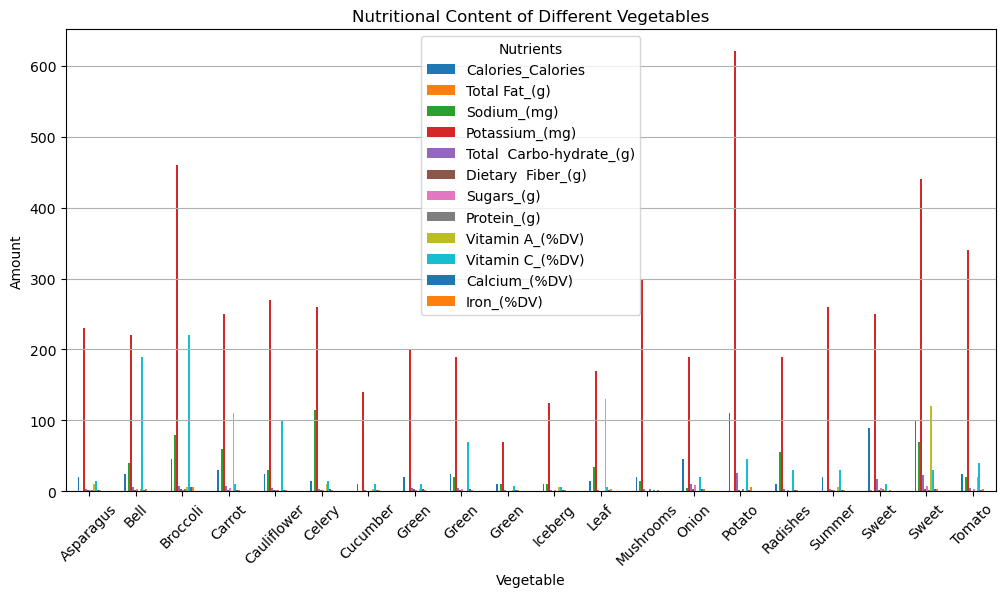

In [30]:
vegetable.set_index('plants', inplace=True)

# Plotting the grouped bar chart
vegetable.plot(kind='bar', figsize=(12, 6))
plt.title('Nutritional Content of Different Vegetables')
plt.xlabel('Vegetable')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Nutrients')
plt.grid(axis='y')

In [31]:
merged_veg = pd.merge(rawplant, vegetable, on='plants')
merged_veg

,plants,sowInstructions,spaceInstructions,harvestInstructions,avoidInstructions,image,growthType,compatiblePlant_0,compatiblePlant_1,vegetable name,...,Sodium_(mg),Potassium_(mg),Total Carbo-hydrate_(g),Dietary Fiber_(g),Sugars_(g),Protein_(g),Vitamin A_(%DV),Vitamin C_(%DV),Calcium_(%DV),Iron_(%DV)
0,Celery,"Grow in seed trays, and plant out in 4-6 weeks...",Space plants: 6 - 12 inches apart,17-18 weeks,Avoid growing close to: Sweetcorn,http://gardenate.com/image/128/thumb/150/150,Normal/Hard,Compatible with (can grow beside),Not applicable as celery needs to be close tog...,Celery 2 medium stalks (110 g/3.9 oz),...,115,260,4,2,2,0,10,15,4,2
1,Cauliflower,"Grow in seed trays, and plant out in 4-6 weeks...",Space plants: 24 - 39 inches apart,15-22 weeks,"Avoid growing close to: Climbing (pole) beans,...",http://gardenate.com/image/126/thumb/150/150,Normal/Hard,Compatible with (can grow beside),"Dwarf (bush) beans, beets, celery, cucumber, o...",Cauliflower 1/6 medium head (99 g/3.5 oz),...,30,270,5,2,2,2,0,100,2,2
2,Carrot,Easy to grow. Sow in garden. Sow seed at a dep...,Space plants: 2 - 12 inches apart,12-18 weeks,"Avoid growing close to: Parsnips, Beetroot, Di...",http://gardenate.com/image/65/thumb/150/150; h...,Easy to grow,Compatible with (can grow beside),"Onions, Leeks, Lettuce, Sage, Peas, Radishes, ...","Carrot 1 carrot, 7"" long, 1 1/4"" diameter (...",...,60,250,7,2,5,1,110,10,2,2
3,Cucumber,Sow in garden. Sow seed at a depth approximate...,Space plants: 16 - 24 inches apart,8-10 weeks,"Avoid growing close to: Potato, Tomatoes",http://gardenate.com/image/13/thumb/150/150; h...,Normal/Hard,Compatible with (can grow beside),"Nasturtiums, Beans, Celery, Lettuce, Sweet Cor...",Cucumber 1/3 medium (99 g/3.5 oz),...,0,140,2,1,1,1,4,10,2,2
4,Asparagus,Easy to grow. Plant as crowns. Best planted at...,Space plants: 8 - 16 inches apart,2-3 years,"Avoid growing close to: Garlic, Onions, and ro...",http://gardenate.com/image/66/thumb/150/150,Easy to grow,Compatible with (can grow beside),"Parsley, Basil, Nasturtiums, Lettuce",Asparagus 5 spears (93 g/3.3 oz),...,0,230,4,2,2,2,10,15,2,2
5,Broccoli,"Easy to grow. Grow in seed trays, and plant ou...",Space plants: 14 - 20 inches apart,10-16 weeks,"Avoid growing close to: Climbing (pole) beans,...",http://gardenate.com/image/20/thumb/150/150; h...,Easy to grow,Compatible with (can grow beside),"Dwarf (bush) beans, beets, celery, cucumber, o...",Broccoli 1 medium stalk (148 g/5.3 oz),...,80,460,8,3,2,4,6,220,6,6
6,Potato,Plant tuber. Best planted at soil temperatures...,Space plants: 12 - 16 inches apart,15-20 weeks,"Avoid growing close to: Cucumber, Pumpkin, Sun...",http://gardenate.com/image/151/thumb/150/150; ...,Normal/Hard,Compatible with (can grow beside),"Peas, Beans, Brassicas, Sweetcorn, Broad Beans...",Potato 1 medium (148 g/5.3 oz),...,0,620,26,2,1,3,0,45,2,6
7,Onion,"Easy to grow. Grow in seed trays, and plant ou...",Space plants: 2 - 4 inches apart,25-34 weeks,"Avoid growing close to: Peas, Beans",http://gardenate.com/image/115/thumb/150/150; ...,Easy to grow,Compatible with (can grow beside),"Lemon Balm, Borage, Carrots, Beets, Silverbeet...",Onion 1 medium (148 g/5.3 oz),...,5,190,11,3,9,1,0,20,4,4
8,Tomato,"Grow in seed trays, and plant out in 4-6 weeks...",Space plants: 16 - 24 inches apart,8-17 weeks,"Avoid growing close to: Rosemary, Potatoes, Fe...",http://gardenate.com/image/26/thumb/150/150; h...,Normal/Hard,Compatible with (can grow beside),"Asparagus, Chervil,Carrot, Celery, Chives, Par...",Tomato 1 medium (148 g/5.3 oz),...,20,340,5,1,3,1,20,40,2,4


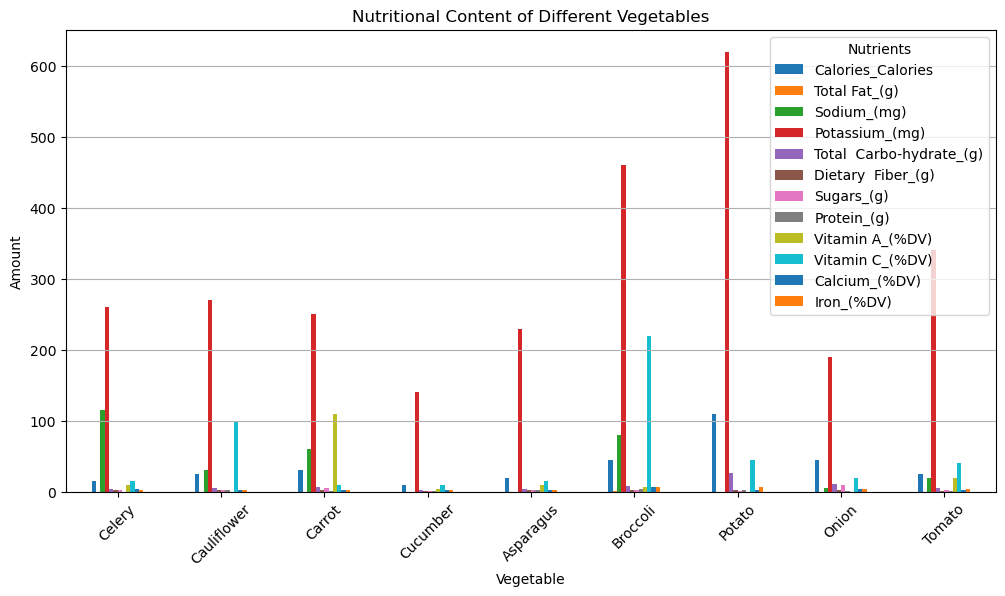

In [32]:
merged_veg.set_index('plants', inplace=True)

# Plotting the grouped bar chart
merged_veg.plot(kind='bar', figsize=(12, 6))
plt.title('Nutritional Content of Different Vegetables')
plt.xlabel('Vegetable')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Nutrients')
plt.grid(axis='y')


In [33]:
merged_fruit = pd.merge(rawplant, fruit, on='plants')
merged_fruit

,plants,sowInstructions,spaceInstructions,harvestInstructions,avoidInstructions,image,growthType,compatiblePlant_0,compatiblePlant_1,fruit name,...,Total Carb. (g),Total Carb. (%DV),Dietary Fiber (g),Dietary Fiber (%DV),Sugars (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
0,Watermelon,"Grow in seed trays, and plant out in 4-6 weeks...",Space plants: 24 - 30 inches apart,12-17 weeks,Avoid growing close to: Potatoes,http://gardenate.com/image/118/thumb/150/150; ...,Normal/Hard,Compatible with (can grow beside),"Sweetcorn, Sunflowers",Watermelon 1/18 medium melon; 2 cups diced p...,...,21,7,1,4,20,1,30,25,2,4


In [ ]:
merged_fruit.columns

In [ ]:
merged_veg.columns

In [ ]:
merged_veg.rename(columns={'Calories_Calories': 'Calories','Calories  from Fat_Calories  from Fat': 'Calories  from  Fat',
       'Total Fat_(g)': 'Total Fat  (g)', 'Total Fat_(%DV)': 'Total Fat (%DV)', 'Sodium_(mg)': 'Sodium  (mg)', 'Sodium_(%DV)': 'Sodium  (%DV)', 'Potassium_(mg)': 'Potassium  (mg)', 'Potassium_(%DV)': 'Potassium  (%DV)', 'Total  Carbo-hydrate_(g)':'Total  Carb.  (g)','Total  Carbo-hydrate_(%DV)': 'Total  Carb.  (%DV)', 'Dietary  Fiber_(g)': 'Dietary  Fiber  (g)', 'Dietary  Fiber_(%DV)':'Dietary  Fiber  (%DV)', 'Sugars_(g)': 'Sugars  (g)', 'Protein_(g)': 'Protein  (g)', 'Vitamin A_(%DV)': 'Vitamin  A  (%DV)', 'Vitamin C_(%DV)': 'Vitamin  C  (%DV)', 'Calcium_(%DV)': 'Calcium  (%DV)', 'Iron_(%DV)': 'Iron  (%DV)'}) 